<h2 style="text-align:center">HEPATİT HASTALIĞI TAHMİNİ</h2>

In [194]:
#gerekli kütüphanelerin import edilmesi
import pandas as pd
import numpy as np # kullanmamışım
import matplotlib.pyplot as plt
import seaborn as sns

from random import randrange
from random import random
from math import exp
from sklearn.preprocessing import LabelEncoder

In [195]:
#adresi verilien csv formatlı veri setinin okunması
#head() fonksiyonu ilk 5 satırı listelenmesini sağlar, aldığı parametre ile istediği sayıda satır yazdırabilir
veri = pd.read_csv("hepatitis.csv")
veri.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1


In [196]:
#veri seti içinde bulunan girdilerin türlerini sorgulama
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   class           142 non-null    int64  
 1   age             142 non-null    int64  
 2   sex             142 non-null    int64  
 3   steroid         142 non-null    int64  
 4   antivirals      142 non-null    int64  
 5   fatigue         142 non-null    int64  
 6   malaise         142 non-null    int64  
 7   anorexia        142 non-null    int64  
 8   liver_big       142 non-null    int64  
 9   liver_firm      142 non-null    int64  
 10  spleen_palable  142 non-null    int64  
 11  spiders         142 non-null    int64  
 12  ascites         142 non-null    int64  
 13  varices         142 non-null    int64  
 14  bilirubin       142 non-null    float64
 15  alk_phosphate   142 non-null    int64  
 16  sgot            142 non-null    int64  
 17  albumin         142 non-null    flo

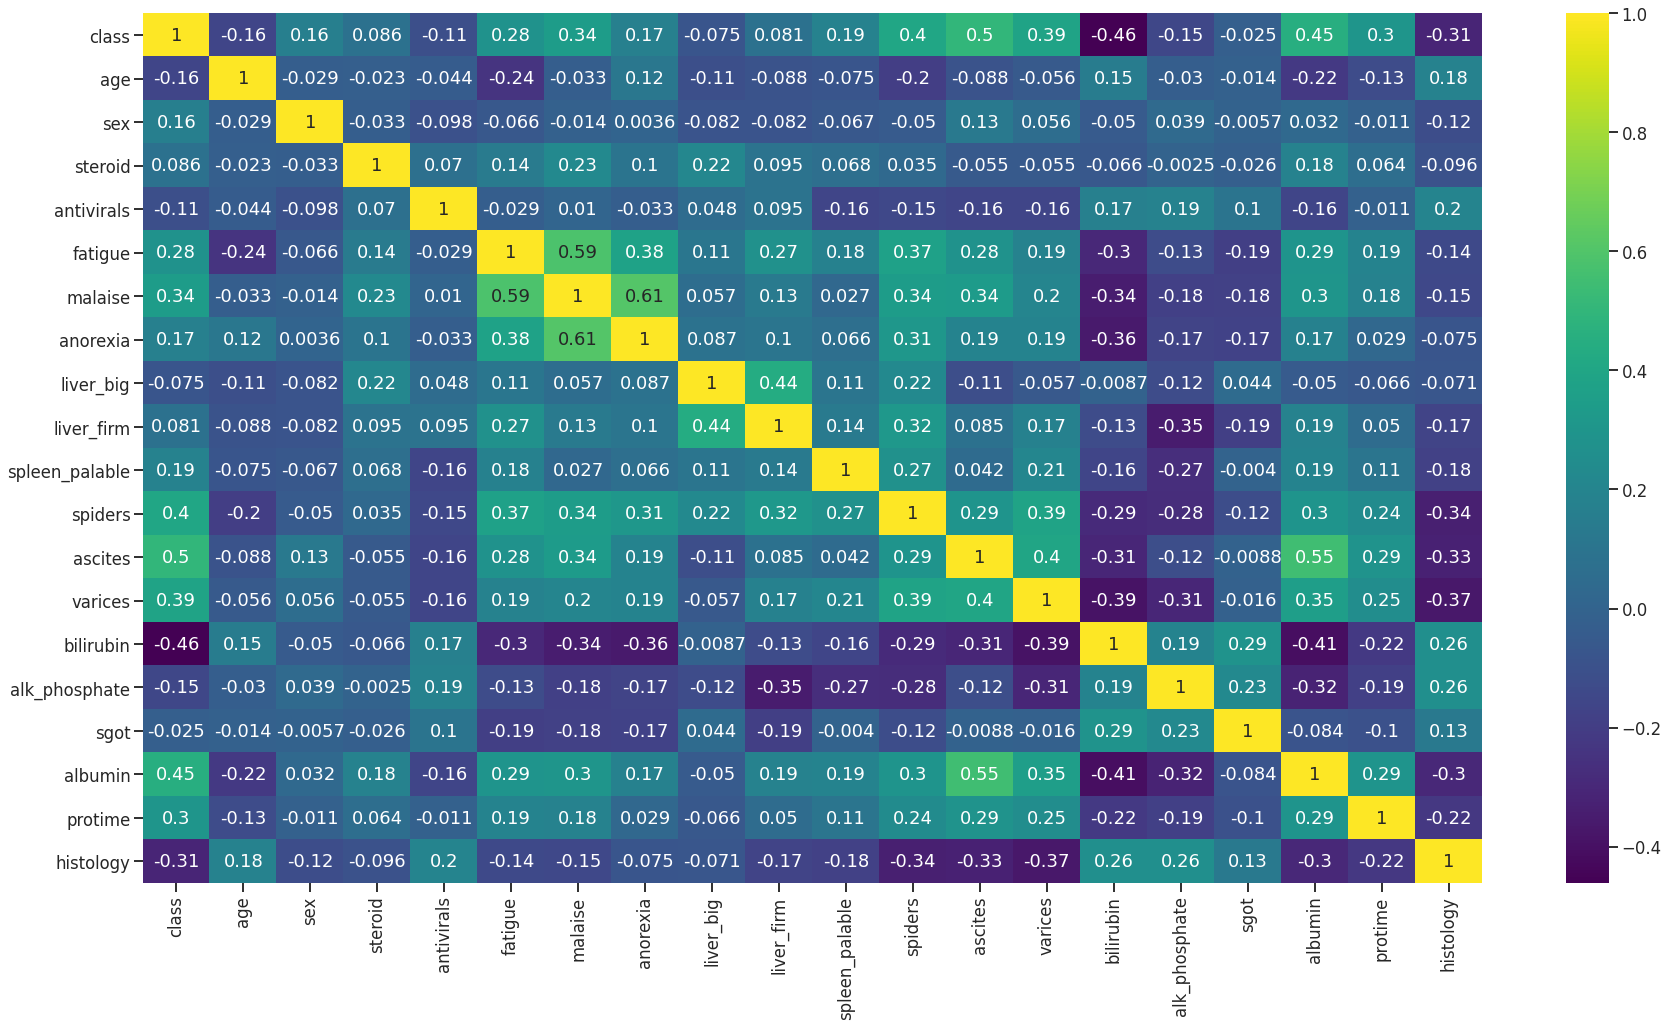

In [197]:
#korolasyon matrisinin oluşturulması
sns.set(style = "ticks", context = "talk")
plt.figure(figsize=(30, 16))
sns.heatmap(veri.corr(), annot=True, cmap='viridis')

<Figure size 1440x720 with 0 Axes>

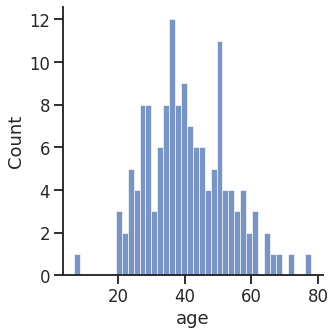

<Figure size 1440x720 with 0 Axes>

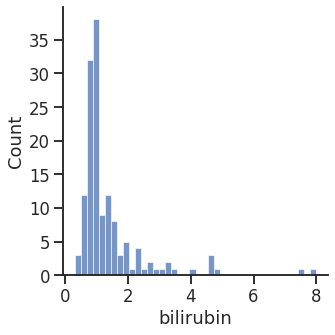

<Figure size 1440x720 with 0 Axes>

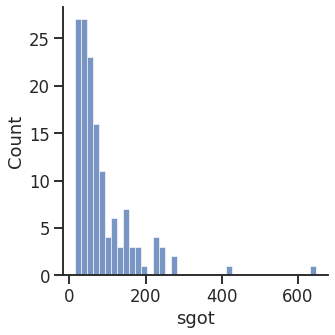

<Figure size 1440x720 with 0 Axes>

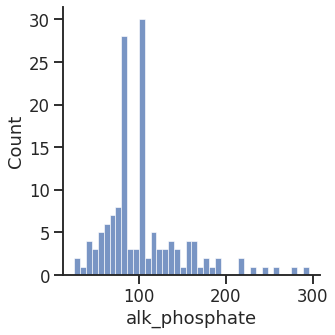

<Figure size 1440x720 with 0 Axes>

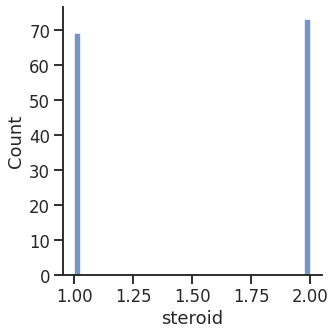

In [198]:
# Bazı verilerin görselleştirilmesi
plt.figure(figsize=(20, 10))
sns.displot(veri.age, bins=40)

plt.figure(figsize=(20, 10))
sns.displot(veri.bilirubin, bins=40)

plt.figure(figsize=(20, 10))
sns.displot(veri.sgot, bins=40)

plt.figure(figsize=(20, 10))
sns.displot(veri.alk_phosphate, bins=40)

plt.figure(figsize=(20, 10))
sns.displot(veri.steroid, bins=40)



In [199]:
# Boşluk değere sahip olmayan sütunların varlığından emin olmak için sorgulama işlemi
veri.isnull().sum()

class             0
age               0
sex               0
steroid           0
antivirals        0
fatigue           0
malaise           0
anorexia          0
liver_big         0
liver_firm        0
spleen_palable    0
spiders           0
ascites           0
varices           0
bilirubin         0
alk_phosphate     0
sgot              0
albumin           0
protime           0
histology         0
dtype: int64

In [200]:
#Uniq değere sahip olmayan parametlerin tespiti ve 
veri.nunique()

class              2
age               47
sex                2
steroid            2
antivirals         2
fatigue            2
malaise            2
anorexia           2
liver_big          2
liver_firm         2
spleen_palable     2
spiders            2
ascites            2
varices            2
bilirubin         33
alk_phosphate     79
sgot              83
albumin           30
protime           43
histology          2
dtype: int64

In [201]:
veri.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1


In [202]:
#class ı son koluma taşıdık
veri = veri[['age', 'sex',
 'steroid',
 'antivirals',
 'fatigue',
 'malaise',
 'anorexia',
 'liver_big',
 'liver_firm',
 'spleen_palable',
 'spiders',
 'ascites',
 'bilirubin',
 'alk_phosphate',
 'sgot',
 'albumin',
 'protime',
 'histology',
 'class']]

In [203]:
veri.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,2,1,2,2,2,2,1,2,2,2,2,1.0,85,18,4.0,61,1,2
1,50,1,1,2,1,2,2,1,2,2,2,2,0.9,135,42,3.5,61,1,2
2,78,1,2,2,1,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1,2
3,34,1,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1,2
4,34,1,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1,2


In [204]:
def convert_to_list():
   
    dataset = list()

    # dataframe'in liste dönüştürülmesi
    dataset = veri.values.tolist()  
    return dataset

In [205]:
# String değerleri integera çevirme aşaması
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
    for row in dataset:
        row[column] = lookup[row[column]]

In [206]:
# Her sütunun min ve max değerlerini bulma  
def dataset_minmax(dataset):
    minmax = list()
    stats = [[min(column), max(column)] for column in zip(*dataset)]
    return stats

In [207]:
# Datasetteki sütun değerlerini 0-1 aralığında olacak şekilde ölçeklendirme
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)-1):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

In [208]:
# k folds adedince verisetini bölme işlemi
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

In [209]:
# Programın doğruluk yüzdesini hesaplama
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [210]:
# Bir girdi için nöron aktivasyonunu hesaplama
def input_function(weights, inputs):
    matrix = weights[-1]
    for i in range(len(weights)-1):
        matrix += weights[i] * inputs[i]
    return matrix

In [211]:
# Transfer nöron aktivasyonu
def activation_function(matrix):
    return 1.0 / (1.0 + exp(-matrix))

In [212]:
# Forward propagate input to a network output
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            matrix = input_function(neuron['weights'], inputs)
            neuron['output'] = activation_function(matrix)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

In [213]:
# Nöron çıktsının türevinin hesaplanması
def transfer_derivative(output):
    return output * (1.0 - output)

In [214]:
# Backpropagate hatası ve nöronlarda depolanması
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

In [215]:
# Ağ ağırlıklarını hatayla güncelleme
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta']

In [216]:
# Bir ağı sabit sayıda dönem için eğitin
def train_network(train, l_rate, n_epoch, n_hidden):
    n_inputs = len(train[0]) - 1
    n_outputs = len(set([row[-1] for row in train]))
    network = initialize_network(n_inputs, n_hidden, n_outputs)
    for epoch in range(n_epoch):
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
    return network

In [217]:
# Ağın başlatılması
def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network

In [218]:
# Ağı kullanarak tahmin işlemlerinin yapılması
def predict(network, test):
    predictions = list()
    for row in test:
        outputs = forward_propagate(network, row)
        prediction = outputs.index(max(outputs))
        predictions.append(prediction)
    return(predictions)

In [219]:
def train_split(folds):
    train_set = list(folds)
    train_set.remove(fold)
    train_set = sum(train_set, [])
    test_set = list()

In [220]:
#Verilerin yüklenmesi
dataset = convert_to_list()

# sınıf sütununu tam sayıya dönüştür
str_column_to_int(dataset, len(dataset[0])-1)

# girdi değişkenlerini normalleştirme
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)

In [222]:
# algoritmanın hazırlanması
n_foldsS = [5, 6, 7, 8, 9, 10]
l_rate = 0.2
n_epochs = 60
n_hidden = 9

accuracyList = []

for n_folds in n_foldsS:
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None    
        network = train_network(train_set, l_rate, n_epoch, n_hidden)
        predicted = predict(network, test_set)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    accuracyList.append((sum(scores)/float(len(scores))))
    print( "n_fold : ",n_epoch,' Scores: %s' % scores)
    print("n_fold: ",n_epoch,'Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))
    print("\n\n")

n_fold :  60  Scores: [89.28571428571429, 78.57142857142857, 85.71428571428571, 75.0, 89.28571428571429]
n_fold:  60 Mean Accuracy: 83.571%



n_fold :  60  Scores: [91.30434782608695, 82.6086956521739, 78.26086956521739, 78.26086956521739, 82.6086956521739, 95.65217391304348]
n_fold:  60 Mean Accuracy: 84.783%



n_fold :  60  Scores: [85.0, 80.0, 85.0, 85.0, 80.0, 85.0, 80.0]
n_fold:  60 Mean Accuracy: 82.857%



n_fold :  60  Scores: [94.11764705882352, 88.23529411764706, 88.23529411764706, 82.35294117647058, 70.58823529411765, 64.70588235294117, 100.0, 88.23529411764706]
n_fold:  60 Mean Accuracy: 84.559%



n_fold :  60  Scores: [73.33333333333333, 73.33333333333333, 93.33333333333333, 86.66666666666667, 86.66666666666667, 80.0, 73.33333333333333, 86.66666666666667, 93.33333333333333]
n_fold:  60 Mean Accuracy: 82.963%



n_fold :  60  Scores: [92.85714285714286, 85.71428571428571, 85.71428571428571, 92.85714285714286, 92.85714285714286, 78.57142857142857, 85.71428571428571, 78.57

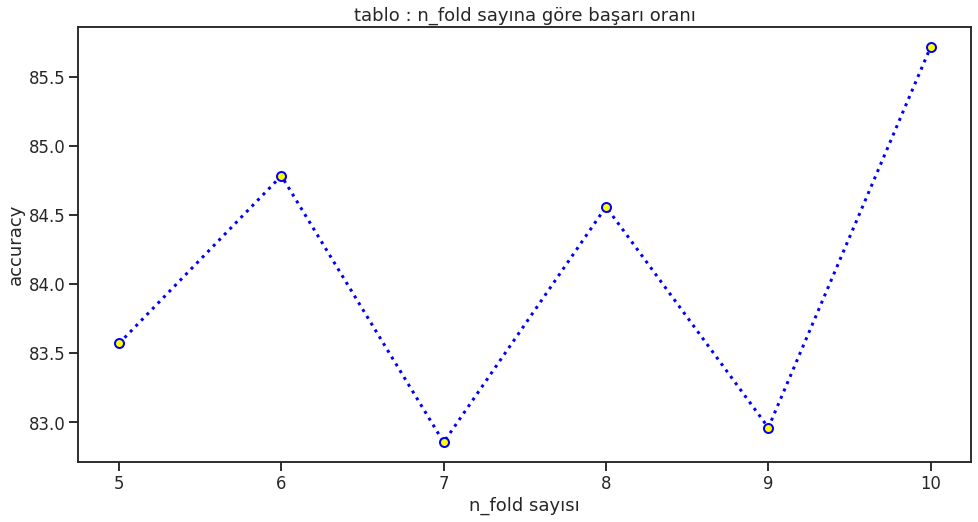

In [223]:
plt.figure(figsize = (16,8))
plt.xlabel("n_fold sayısı")
plt.ylabel("accuracy")
plt.title("tablo : n_fold sayına göre başarı oranı")

plt.plot(n_foldsS, accuracyList,
         color="blue",
         linewidth=3,
         linestyle=":",
         marker="o",
         markerfacecolor="yellow",
         markeredgewidth=2, 
         markeredgecolor="blue")